# Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

# Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

# Features Explanation :

Happiness Rank: Rank of any country in a particular year.

Country: Name of the country.

Standard Error: The standard error of the happiness score.

Happiness Score: Happiness score as the sum of all numerical columns in the datasets.

Economy (GDP per Capita): The extent to which GDP contributes to the calculation of the Happiness score

Trust: A quantification of the people’s perceived trust in their governments.

Health (Life Expectancy): The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Generosity: Numerical value estimated based on the perception of Generosity experienced by poll takers in their country.

Family Support: Metric estimating satisfaction of people with their friends and family.

Freedom: Perception of freedom quantified.

Dystopia: Hypothetically the saddest country in the world.

In [1]:
#Importing the necessary libraries/packages

import warnings
warnings.simplefilter("ignore")
import pickle
import joblib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from pandas_profiling import ProfileReport
import scipy.stats as stats
from scipy.stats import zscore

import warnings
warnings.simplefilter("ignore")
import pickle
import joblib


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

I will now read the raw happiness_score_dataset.csv file. 



In [2]:
df = pd.read_csv("happiness_score_dataset.csv")

# EDA(Exploratory Data Analysis)

Let's check how our data looks like. We will be viewing only the first and last 5 rows.

In [3]:
df

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

In the above cell, at the bottom we can see the total number of rows and columns. Here, our target label is the Happiness Score and all the remaining columns are the features that will be contributing towards the label prediction.

However the categorical columns are useless and the Happiness Rank is just a list of numbers so they doesn't seem important in the Happiness Score evaluation. We will analyze further to see if this is indeed correct and will be dropping any column that doesn't contribute towards the label prediction.

This is going to be a Regression problem as our label is continuous data.

In [4]:
# checking the shape of the dataset

df.shape

(158, 12)

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# About the columns

1. Country: This column gives the name of the country.


2. Region: It gives the area from where the country belong.


3. Happiness Rank: This column shows the Happiness Rank of any country in a particular year.


4. Happiness Score: It shows the Happiness score as the sum of all numerical columns in the dataset.


5. Standard Error: It gives the standard error of the happiness score.


6. Economy (GDP per Capita): This column gives the extent to which GDP contributes to the calculation of the Happiness score


7. Family Support: It shows the Metric estimating satisfaction of people with their friends and family.


8. Health (Life Expectancy): It shows the extent to which Life expectancy contributed to the calculation of the Happiness Score.


9. Freedom: This column shows Perception of freedom quantified.


10. Trust: It shows the quantification of the people’s perceived trust in their governments.


11. Generosity: It is the Numerical value estimated based on the perception of Generosity experienced by poll takers in their country.


12. Dystopia: It shows hypothetically the saddest country in the world.


In [6]:
#cross verifying to ensure we do not have any missing values in our data.

df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
# Using Pandas Profiling Report on our data set

profile_1 = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile_1.to_widgets() # it helps to get a visualization on the entire data set

With the overview section, we can see that there are no missing data or duplicates in our data set showcasing it to be a very clean data and requires no treatment.

# Describing the dataset

In [8]:
#checking the statistics

df.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

Using the describe method, we are able to ignore the categorical columns and get an insight on the numerical data such as the total count, the mean of those column data, standard deviation, minimum-maximum range and the inter quantile data.

In [9]:
#checking the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [10]:
# Dropping columns that are not contributing towards the label prediction

df_new = df.drop(['Country', 'Region', 'Happiness Rank'], axis=1)
df_new

Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 9 columns]

In [11]:
#Checking Correlation between variables

corr = df_new.corr()
corr

Happiness Score  Standard Error  \
Happiness Score                       1.000000       -0.177254   
Standard Error                       -0.177254        1.000000   
Economy (GDP per Capita)              0.780966       -0.217651   
Family                                0.740605       -0.120728   
Health (Life Expectancy)              0.724200       -0.310287   
Freedom                               0.568211       -0.129773   
Trust (Government Corruption)         0.395199       -0.178325   
Generosity                            0.180319       -0.088439   
Dystopia Residual                     0.530474        0.083981   

                               Economy (GDP per Capita)    Family  \
Happiness Score                                0.780966  0.740605   
Standard Error                                -0.217651 -0.120728   
Economy (GDP per Capita)                       1.000000  0.645299   
Family                                         0.645299  1.000000   
Health (Life Expectancy)                       0.816478  0.531104   
Freedom                                        0.370300  0.441518   
Trust (Government Corruption)                  0.307885  0.205605   
Generosity                                    -0.010465  0.087513   
Dystopia Residual                              0.040059  0.148117   

                               Health (Life Expectancy)   Freedom  \
Happiness Score                                0.724200  0.568211   
Standard Error                                -0.310287 -0.129773   
Economy (GDP per Capita)                       0.816478  0.370300   
Family                                         0.531104  0.441518   
Health (Life Expectancy)                       1.000000  0.360477   
Freedom                                        0.360477  1.000000   
Trust (Government Corruption)                  0.248335  0.493524   
Generosity                                     0.108335  0.373916   
Dystopia Residual                              0.018979  0.062783   

                               Trust (Government Corruption)  Generosity  \
Happiness Score                                     0.395199    0.180319   
Standard Error                                     -0.178325   -0.088439   
Economy (GDP per Capita)                            0.307885   -0.010465   
Family                                              0.205605    0.087513   
Health (Life Expectancy)                            0.248335    0.108335   
Freedom                                             0.493524    0.373916   
Trust (Government Corruption)                       1.000000    0.276123   
Generosity                                          0.276123    1.000000   
Dystopia Residual                                  -0.033105   -0.101301   

                               Dystopia Residual  
Happiness Score                         0.530474  
Standard Error                          0.083981  
Economy (GDP per Capita)                0.040059  
Family                                  0.148117  
Health (Life Expectancy)                0.018979  
Freedom                                 0.062783  
Trust (Government Corruption)          -0.033105  
Generosity                             -0.101301  
Dystopia Residual                       1.000000

# VISUALIZATION OF THE DATA

# Using Heatmap

<AxesSubplot:>

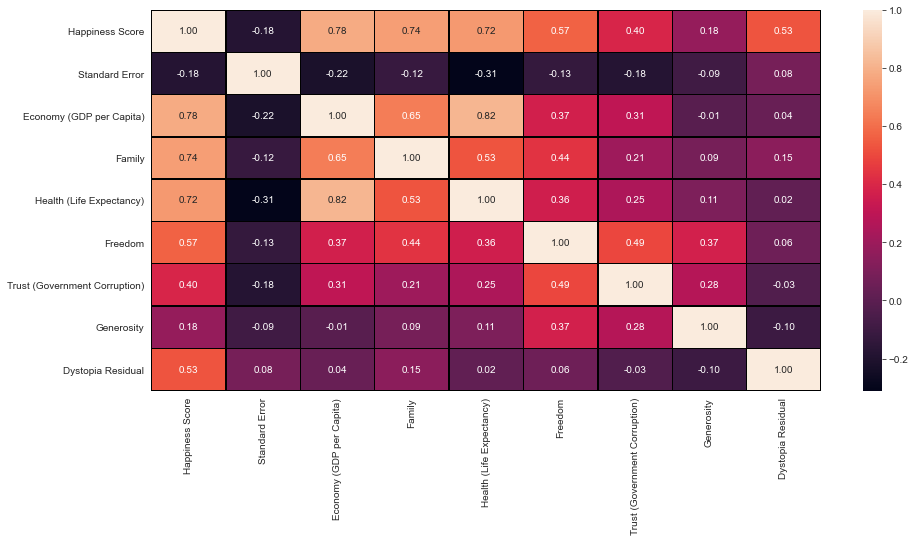

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

# Outcome of correlation:

From the heatmap, we see that the correlation between Happiness Score which is our label with all other feature columns shows that each one of them have something to contribute be it a high or low value.

It is clear that columns 'Economy , Family, and Health' contribute the most in Happiness score.

Max correlation: Economy(GDP per Capita)
    
Min correlation: Standard Error

# Using Pairplot

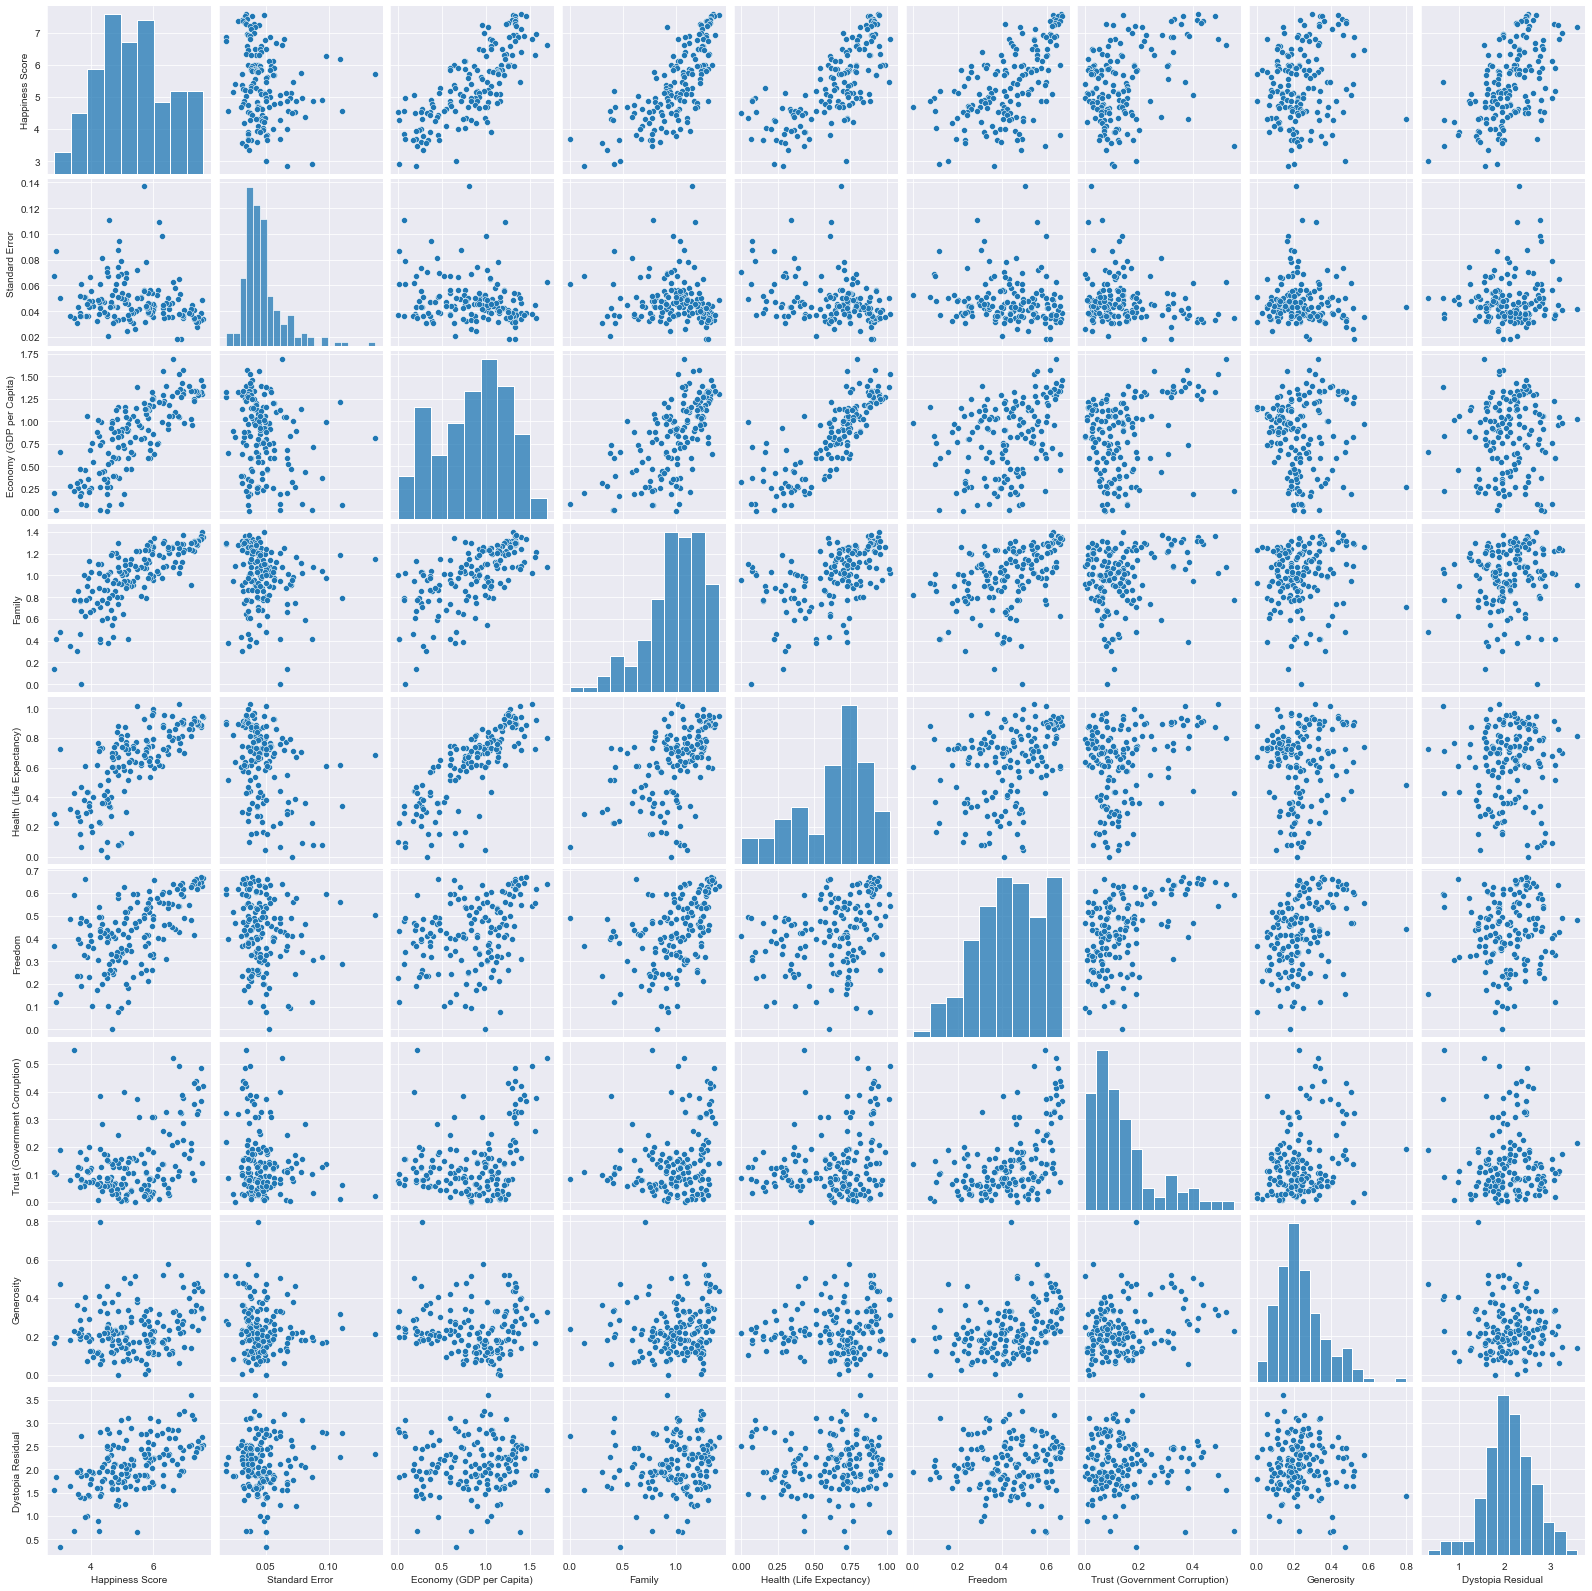

In [13]:
sns.pairplot(df_new)
plt.show()

Pairplot basically gives a picturization of both scatter plot + histogram and shows how the data distribution looks like. However the labels are quite tiny and to have a closer look at the skewness we will check Normal Distribution Curve.

# Using Distplot

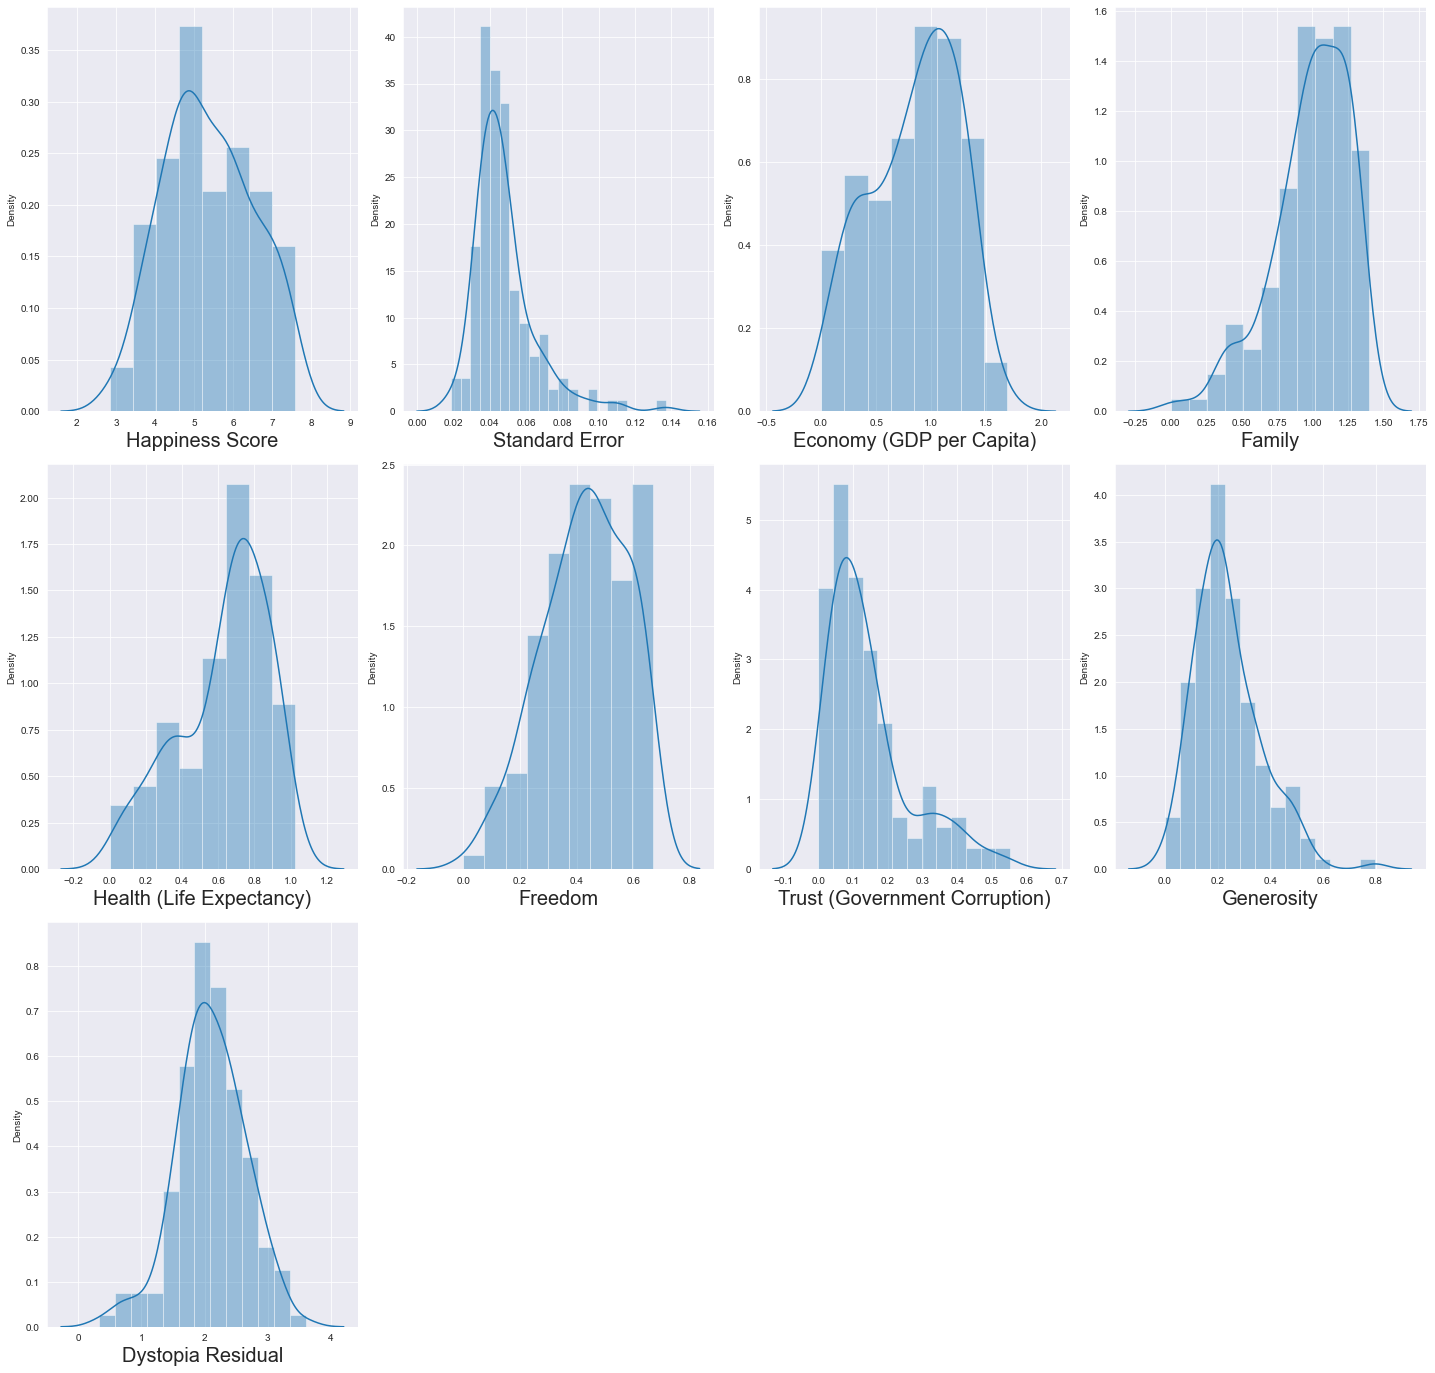

In [14]:
#Let's check how data is distributed for every coloumn


plt.figure(figsize=(20,25))

plotnumber=1

for column in df_new:
    if plotnumber<=16 : 
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In the above cell, we checked the Normal Distribution Curve of the data and it shows that the data is not normalised. The building blocks is out of the normalised curve. Thus, the normal distribution shows that the data is skewed.

In [15]:
# Using Skew function to Check the skewness of coulmns where acceptable range is between -0.5 to 0.5

df_new.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Thus, with the help of skew method, we see columns that are off from the acceptable rangle of -0.5 to 0.5. This indicates that we have outliers present in our data set that will be required to be treated.

In [16]:
# Using Pandas Profiling Report on our new data set

profile_2 = ProfileReport(df_new, title="Pandas Profiling Report", explorative=True)
profile_2.to_notebook_iframe()

Our new data set shows only numeric variables along with the correlation information and there are scatter plots named as interactions for each column vs Happiness score (our label) visualizing all the data points in relation with that particular feature corresponding with the label.

# Outlier removal

The feature columns that have skewness are Standard Error, Freedom, Generosity and Dystopia Residual.

As we have already tried retaining the outliers earlier to build our regression models but it did not give us proper score therefore attempting again to clean the data by removing the outliers and then will be checking the model accuracy.

In [17]:
# Z Score method

import scipy.stats as stats
from scipy.stats import zscore

z=np.abs(zscore(df_new))
threshold=3
np.where(z>3)

df_new1=df_new[(z<3).all(axis=1)]

df_new1 # Creating after removing the outliers

Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
150            3.655         0.05141                   0.46534  0.77115   
151            3.587         0.04324                   0.25812  0.85188   
152            3.575         0.03084                   0.31982  0.30285   
154            3.340         0.03656                   0.28665  0.35386   
156            2.905         0.08658                   0.01530  0.41587   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
150                   0.15185  0.46866                        0.17922   
151                   0.27125  0.39493                        0.12832   
152                   0.30335  0.23414                        0.09719   
154                   0.31910  0.48450                        0.08010   
156                   0.22396  0.11850                        0.10062   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
150     0.20165            1.41723  
151     0.21747            1.46494  
152     0.36510            1.95210  
154     0.18260            1.63328  
156     0.19727            1.83302  

[149 rows x 9 columns]

With the help of Z Score method, we are able to detect the outliers and have removed them from our data set.

In [18]:
# Percentage of Data Loss

data_loss=(158-149)/158*100 # 158 was the number of rows in original data set and 149 after the removal of outliers
data_loss

5.69620253164557

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [19]:
X = df_new1.drop('Happiness Score', axis=1)  # List of all features
Y = df_new1['Happiness Score']      # Data of our label

Here, we have simply separated our new data set into label and features for further processing.

In [20]:
# Checking the content of X

X

Standard Error  Economy (GDP per Capita)   Family  \
0           0.03411                   1.39651  1.34951   
1           0.04884                   1.30232  1.40223   
2           0.03328                   1.32548  1.36058   
3           0.03880                   1.45900  1.33095   
4           0.03553                   1.32629  1.32261   
..              ...                       ...      ...   
150         0.05141                   0.46534  0.77115   
151         0.04324                   0.25812  0.85188   
152         0.03084                   0.31982  0.30285   
154         0.03656                   0.28665  0.35386   
156         0.08658                   0.01530  0.41587   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
150                   0.15185  0.46866                        0.17922   
151                   0.27125  0.39493                        0.12832   
152                   0.30335  0.23414                        0.09719   
154                   0.31910  0.48450                        0.08010   
156                   0.22396  0.11850                        0.10062   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
150     0.20165            1.41723  
151     0.21747            1.46494  
152     0.36510            1.95210  
154     0.18260            1.63328  
156     0.19727            1.83302  

[149 rows x 8 columns]

In [21]:
# Checking the content of Y

Y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In the above 2 cells, we can clearly see that the feature and label data have been separated successfully using the new data set of 149 rows each.

# Scaling the Data

In [48]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [49]:
#How the X_scaled data looks like after applying the Power Transformer Scaler

X_scaled

array([[-0.86678606,  1.38191593,  1.35787859, ...,  2.47225453,
         0.54630526,  0.7568764 ],
       [ 0.18566863,  1.13832385,  1.5678818 , ...,  0.00924715,
         1.71389767,  1.10929978],
       [-0.92608935,  1.19821973,  1.40197448, ...,  3.03674718,
         0.91963022,  0.70850719],
       ...,
       [-1.10042671, -1.40259581, -2.81135429, ..., -0.38241996,
         1.11805063, -0.32213507],
       [-0.69173419, -1.48837933, -2.60816264, ..., -0.53365337,
        -0.40922585, -0.9307015 ],
       [ 2.88218185, -2.19013866, -2.36115394, ..., -0.35206708,
        -0.28645792, -0.54943602]])

We see that in the scaled feature format there are positive as well as negative values in it. And as mentioned earlier, if the outliers affect the machine learning models then we have to remove them.

# Splitting data into training and testing

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled , Y , test_size=0.25 , random_state=160, shuffle=True)

Here, we are taking 25 percent of the total data present in the dataset for testing purpose and the remaining 75 percent will be used in testing purpose during model building process.

In [51]:
Y_train.head()

29     6.574
133    4.218
4      7.427
106    4.739
11     7.226
Name: Happiness Score, dtype: float64

# Machine Learning Model for Regression

In [52]:
# HERE WE USE LINEAR REGRESSION

regression = LinearRegression()
regression.fit(X_train,Y_train)


LinearRegression()

In [53]:
#Predicting Happiness Score by given Features :

print ('Happines Score : ' ,regression.predict(scalar.transform([[0.03,1.39,1.34,0.94,0.66,0.41,0.29,2.51]])))

Happines Score :  [7.53993839]


Above, we can give input according to data received and our model will be able to predict 'Happiness Score'

In [54]:
#Adjusted R2 Score 
#Checking Model Confidence

regression.score(X_train,Y_train)

0.9999999284746574

In [55]:
#Checking how well model fits testing data

regression.score(X_test,Y_test)

0.9999999501205843

In [56]:
#Let's Plot and Visualize

Y_pred = regression.predict(X_test)

In [57]:
Y_pred

array([3.89653246, 6.66961499, 5.83261095, 6.57502827, 6.75011189,
       4.78641866, 6.85296434, 2.90456932, 3.84500939, 3.68085342,
       5.77038869, 5.09754694, 6.13011554, 7.28397586, 5.85519885,
       3.93078729, 4.50721702, 7.58689623, 7.40603475, 4.07676483,
       5.58857796, 6.26923508, 4.78788657, 5.79055954, 6.454589  ,
       5.84761115, 4.34996108, 5.01309304, 5.07327068, 4.564701  ,
       3.7807798 , 3.34007433, 3.65512849, 3.98885514, 5.81250942,
       4.03304661, 4.33216375, 6.12273703])

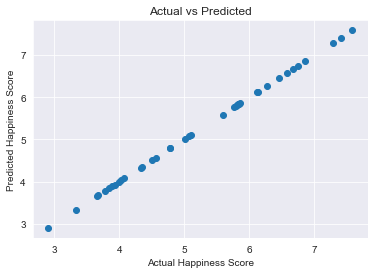

In [58]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted')
plt.show()

In [59]:
#Model Evaluation

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [60]:
Y_pred = regression.predict(X_test)

In [61]:
mean_absolute_error(Y_test,Y_pred)

0.00022935914736756468

In [62]:
mean_squared_error(Y_test,Y_pred)

7.665832198793695e-08

In [63]:
np.sqrt(mean_squared_error(Y_test,Y_pred))

0.00027687239296819927

# Checking whether the model is overfitting or Underfitting using Regularization Techniques

In [64]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [65]:
lassocv = LassoCV(alphas = None , max_iter=1000 , normalize = True)
lassocv.fit(X_train,Y_train)

LassoCV(normalize=True)

In [66]:
alpha = lassocv.alpha_
alpha

7.45534025155444e-05

In [67]:
#Now that we have the best parameter , let's use Lasso Regression and see how well our data fitted before

lass_reg = Lasso(alpha)
lass_reg.fit(X_train,Y_train)

Lasso(alpha=7.45534025155444e-05)

In [74]:
ls=lass_reg.score(X_test,Y_test)
ls

0.9999999074552656

In [69]:
#Checking for Ridge

ridge_cv = RidgeCV(alphas = np.arange(0.1,1.0,10.0), normalize = True)

ridge_cv.fit(X_train,Y_train)

RidgeCV(alphas=array([0.1]), normalize=True)

In [70]:
ridge_model = Ridge(alpha=ridge_cv.alpha_)
ridge_model.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [72]:
ridge_model.score(X_test,Y_test)

0.999999614330899

HENCE, OUR MODEL LOOKS COMPLETELY FINE AND THERE IS NO OVERFITTING/UNDERFITTING OF DATA

# Model Saving

In [75]:
import pickle
filename= 'WHR_FinalModel.pkl'
pickle.dump(ls, open(filename, 'wb'))